# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [153]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Import citipy to find closes city to cordinates. 
from citipy import citipy

# csv out
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes. the whole globe
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [154]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations. try different sizes until we get at least 500 cities pinging back with data. 
lats = np.random.uniform(low=-90.000, high=90.000, size=5000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5000)
#zip together the lats and longs
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination via looping
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list. If not skip. 
    if city not in cities:
        cities.append(city)

#Count length of citeis
len(cities)


1434

In [155]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


In [156]:
print(cities)

['nikolskoye', 'san quintin', 'arraial do cabo', 'kapaa', 'oranjemund', 'channel-port aux basques', 'vaitupu', 'ayan', 'pevek', 'port alfred', 'torbay', 'mahebourg', 'illoqqortoormiut', 'aksu', 'punta arenas', 'maarianhamina', 'albany', 'provideniya', 'grand gaube', 'puerto ayora', 'joshimath', 'pacasmayo', 'dikson', 'atuona', 'new norfolk', 'victoria', 'marawi', 'hithadhoo', 'port hardy', 'lebu', 'ancud', 'namibe', 'busselton', 'agadez', 'vaini', 'amga', 'upington', 'kuybyshevo', 'carnarvon', 'hobart', 'qaanaaq', 'thompson', 'barrow', 'barentsburg', 'tumannyy', 'ushuaia', 'garowe', 'kruisfontein', 'camrose', 'oistins', 'lydenburg', 'mataura', 'khatanga', 'bilma', 'rikitea', 'sulangan', 'amderma', 'bubaque', 'omsukchan', 'lubango', 'jamestown', 'kalmunai', 'pisco', 'tasiilaq', 'la romana', 'petropavlovka', 'cabo san lucas', 'geraldton', 'wittenheim', 'koutsouras', 'thanh hoa', 'tessalit', 'cape town', 'cidreira', 'mys shmidta', 'kodiak', 'richards bay', 'paragominas', 'taolanaro', 'bel

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [157]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of Set 1 : nikolskoye
Processing Record 2 of Set 1 : san quintin
Processing Record 3 of Set 1 : arraial do cabo
Processing Record 4 of Set 1 : kapaa
Processing Record 5 of Set 1 : oranjemund
Processing Record 6 of Set 1 : channel-port aux basques
City not found. Skipping...
Processing Record 7 of Set 1 : ayan
Processing Record 8 of Set 1 : pevek
Processing Record 9 of Set 1 : port alfred
Processing Record 10 of Set 1 : torbay
Processing Record 11 of Set 1 : mahebourg
City not found. Skipping...
Processing Record 12 of Set 1 : aksu
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : maarianhamina
Processing Record 15 of Set 1 : albany
Processing Record 16 of Set 1 : provideniya
Processing Record 17 of Set 1 : grand gaube
Processing Record 18 of Set 1 : puerto ayora
Processing Record 19 of Set 1 : joshimath
Processing Record 20 of Set 1 : pacasmayo
Processing Record 21 of Set 1 : dikson
Processing Record 22 of Set 1 : atuona
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [158]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list})
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,2,RU,1627290370,33,59.7035,30.7861,26.94,1.85
1,San Quintín,99,MX,1627290371,89,30.4833,-115.9500,19.07,2.10
2,Arraial do Cabo,0,BR,1627290372,77,-22.9661,-42.0278,19.92,6.17
3,Kapaa,75,US,1627290374,83,22.0752,-159.3190,27.18,0.89
4,Oranjemund,100,NA,1627290375,27,-28.5500,16.4333,22.01,7.35
...,...,...,...,...,...,...,...,...,...
1337,Ottawa,1,CA,1627291672,95,45.4112,-75.6981,17.77,3.09
1338,Shellbrook,100,CA,1627291706,59,53.2168,-106.4011,14.57,2.82
1339,Kattivākkam,85,IN,1627291707,45,13.2167,80.3167,36.05,3.26
1340,Harvard,0,US,1627291707,85,42.4222,-88.6137,20.51,3.09


In [159]:
weather_dict.count()

City          1342
Cloudiness    1342
Country       1342
Date          1342
Humidity      1342
Lat           1342
Lng           1342
Max Temp      1342
Wind Speed    1342
dtype: int64

In [160]:
weather_dict.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [161]:
#  Get the indices of cities that have humidity over 100%.
weather_dict2 = weather_dict.loc[weather_dict["Humidity"] < 100]
weather_dict2.count()

City          1323
Cloudiness    1323
Country       1323
Date          1323
Humidity      1323
Lat           1323
Lng           1323
Max Temp      1323
Wind Speed    1323
dtype: int64

In [162]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

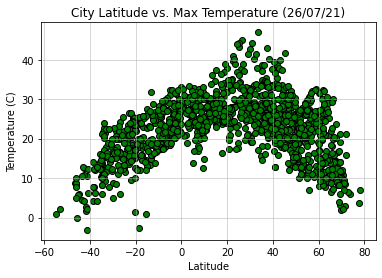

In [163]:
plt.scatter(weather_dict2["Lat"], weather_dict2["Max Temp"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (26/07/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Temperature (C)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("temp_plots/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

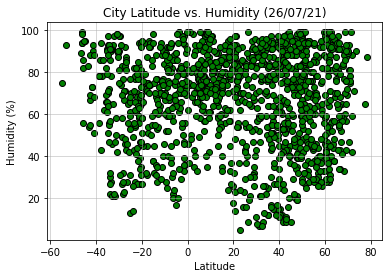

In [164]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict2["Lat"], weather_dict2["Humidity"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (26/07/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("temp_plots/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

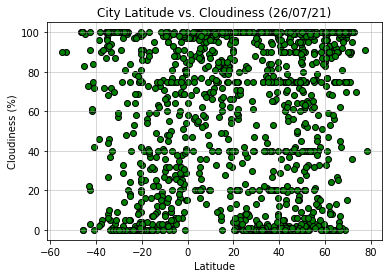

In [165]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict2["Lat"], weather_dict2["Cloudiness"], facecolor = "green", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (26/07/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("temp_plots/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

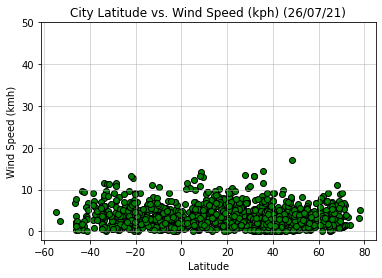

In [166]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict2["Lat"], weather_dict2["Wind Speed"], facecolor = "green", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (kph) (26/07/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (kmh)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("temp_plots/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [167]:
northern_hemisphere = weather_dict2.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict2.loc[weather_dict["Lat"] < 0]
northern_hemisphere


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nikolskoye,2,RU,1627290370,33,59.7035,30.7861,26.94,1.85
1,San Quintín,99,MX,1627290371,89,30.4833,-115.9500,19.07,2.10
3,Kapaa,75,US,1627290374,83,22.0752,-159.3190,27.18,0.89
5,Channel-Port aux Basques,49,CA,1627290377,93,47.5702,-59.1367,13.44,6.09
6,Ayan,47,RU,1627290378,64,56.4500,138.1667,21.10,2.11
...,...,...,...,...,...,...,...,...,...
1337,Ottawa,1,CA,1627291672,95,45.4112,-75.6981,17.77,3.09
1338,Shellbrook,100,CA,1627291706,59,53.2168,-106.4011,14.57,2.82
1339,Kattivākkam,85,IN,1627291707,45,13.2167,80.3167,36.05,3.26
1340,Harvard,0,US,1627291707,85,42.4222,-88.6137,20.51,3.09


In [173]:
southern_hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Arraial do Cabo,0,BR,1627290372,77,-22.9661,-42.0278,19.92,6.17
4,Oranjemund,100,NA,1627290375,27,-28.5500,16.4333,22.01,7.35
8,Port Alfred,72,ZA,1627290380,28,-33.5906,26.8910,21.49,6.16
10,Mahébourg,20,MU,1627290372,67,-20.4081,57.7000,24.58,5.67
12,Punta Arenas,90,CL,1627290384,93,-53.1500,-70.9167,2.06,2.57
...,...,...,...,...,...,...,...,...,...
1330,Otjiwarongo,14,NA,1627291700,31,-20.4637,16.6477,17.21,8.85
1331,Jambi City,9,ID,1627291476,46,-1.6000,103.6167,32.42,1.94
1332,Kabinda,88,CD,1627291702,24,-6.1333,24.4833,27.09,4.80
1335,Kiama,100,AU,1627291703,64,-34.6833,150.8667,15.77,3.58


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

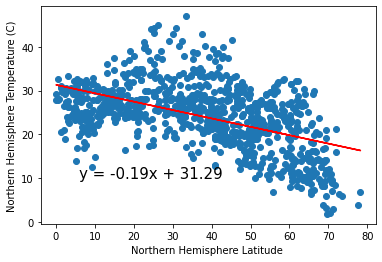

<Figure size 432x288 with 0 Axes>

In [175]:
northern_hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.xlabel('Northern Hemisphere Latitude ')
plt.ylabel('Northern Hemisphere Temperature (C)')
plt.show()
plt.savefig("temp_plots/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

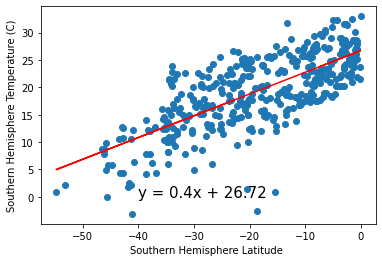

<Figure size 432x288 with 0 Axes>

In [176]:
southern_hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,0),fontsize=15,color="black")
plt.xlabel('Southern Hemisphere Latitude ')
plt.ylabel('Southern Hemisphere Temperature (C)')
plt.show()
plt.savefig("temp_plots/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

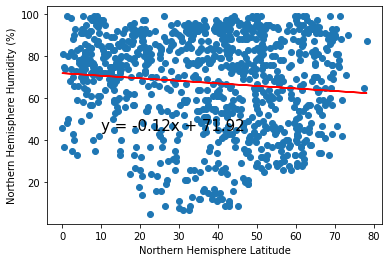

<Figure size 432x288 with 0 Axes>

In [177]:
northern_hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="black")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northern Hemisphere Humidity (%)')
plt.show()
plt.savefig("temp_plots/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

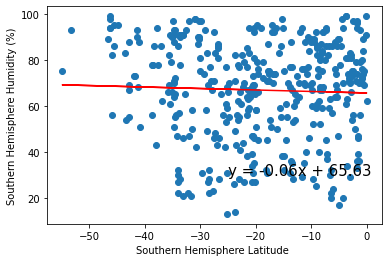

<Figure size 432x288 with 0 Axes>

In [180]:
southern_hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="black")
plt.xlabel('Southern Hemisphere Latitude ')
plt.ylabel('Southern Hemisphere Humidity (%)')
plt.show()
plt.savefig("temp_plots/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

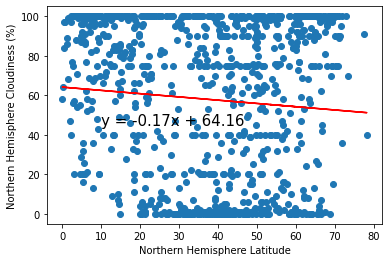

<Figure size 432x288 with 0 Axes>

In [179]:
northern_hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="black")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northern Hemisphere Cloudiness (%)')
plt.show()
plt.savefig("temp_plots/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

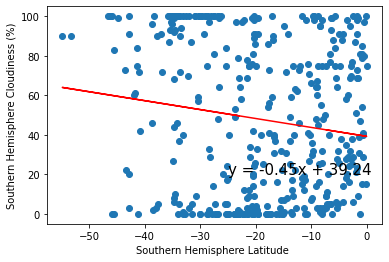

<Figure size 432x288 with 0 Axes>

In [181]:

southern_hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="black")
plt.xlabel('Southern Hemisphere Latitude ')
plt.ylabel('Southern Hemisphere Cloudiness (%)')
plt.show()
plt.savefig("temp_plots/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

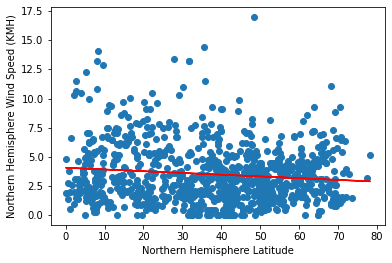

<Figure size 432x288 with 0 Axes>

In [182]:
northern_hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="black")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northern Hemisphere Wind Speed (KMH)')
plt.show()
plt.savefig("temp_plots/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

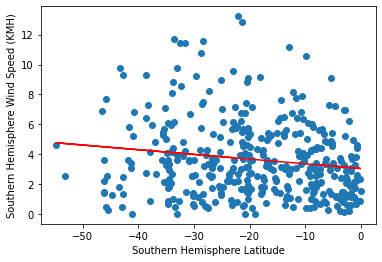

<Figure size 432x288 with 0 Axes>

In [184]:

x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="black")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Wind Speed (KMH)')
plt.show()
plt.savefig("temp_plots/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")